# Heart Disease Predictive Model
1. [Introduction](#introduction)
2. [Data Exploration](#data-exploration)  
&emsp;2.1 [Descriptive Statistics](#descriptive-statistics)  
&emsp;2.2 [Missing Values](#missing-values)  
&emsp;2.3 [Visualization](#visualization)  
&emsp;&emsp;2.3.1 [Categorical Features](#categorical-features)  
&emsp;&emsp;2.3.2 [Age](#age)  
3. [Data Cleaning](#data-cleaning)  
4. [Feature Selection](#feature-selection)  
5. [Model Building](#model-building)  
&emsp;5.1 [Models Using Single Feature](#models-using-single-feature)  
&emsp;5.2 [Multi-Feature Models](#multi-feature-models)  
6. [Model Evaluation](#model-evaluation)

# Introduction
&emsp;This Dataquest guided project's objective is to build a predictive model using the K-Nearest Neighbours algorithm. The available dataset from [Kaggle](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction) contains 12 variables including the response variable (HeartDisease) and 918 records. Relationships between the response variable and the features will be examined and part of the features will be used to train the model for the best accuracy.

## Python Libraries

In [1]:
import numpy as np # array manipulation
import pandas as pd # dataframe
from sklearn.model_selection import train_test_split # split dataset into training, validation, test sets
from sklearn.model_selection import GridSearchCV # choosing the best hyperparameters 
from sklearn.preprocessing import MinMaxScaler # scale features by min and max
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbours algorithm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns 
import matplotlib.pyplot as plt # visualization
import matplotlib as mpl # visualization tuning
mpl.style.use("ggplot") # style of plots
# include graphs in the codes
%matplotlib inline

# Data Exploration

In [2]:
# import dataset
heart = pd.read_csv("https://raw.githubusercontent.com/moscmh/heart_disease/main/heart.csv")
print("Number of observations:", heart.shape[0], "\nNumber of features:", heart.shape[1])
heart.head(5)


Number of observations: 918 
Number of features: 12


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Descriptive Statistics

In [3]:
# Descriptive Statistics
heart.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


## Missing Values

In [4]:
# Search for missing values
heart.isna().sum().sum()

0

The average age of the patients is 53.5. Resting blood pressure and serum cholesterol has values of 0 which seem incorrect. There is no missing values in the dataset.

## Visualization

### Categorical Features

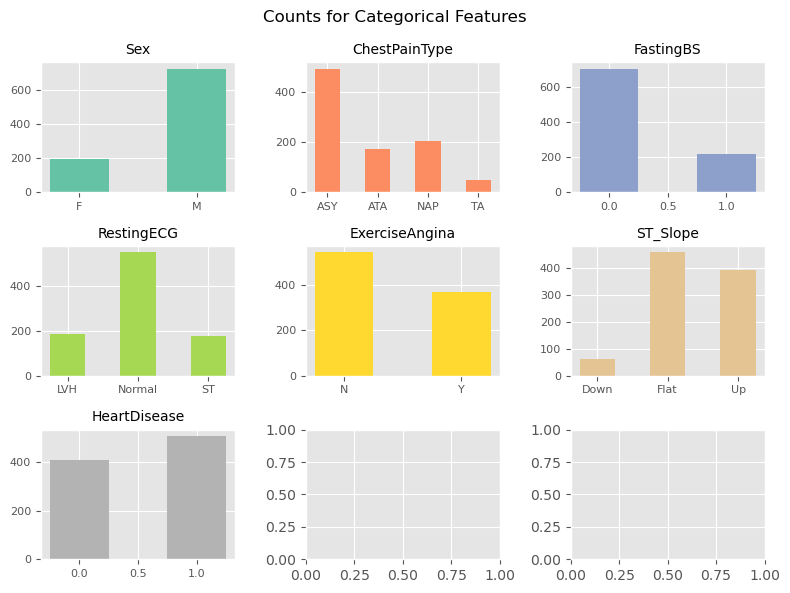

In [5]:
cat_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

cmap = plt.cm.Set2
colors = [cmap(i) for i in np.linspace(0,1,7)]
fig, axes = plt.subplots(3,3, figsize=(8,6))
for i, ax in enumerate(axes.reshape(-1)):
    try:
        counts = heart[cat_cols[i]].value_counts().sort_index() # prepare data for bar charts
        ax.bar(counts.index, counts.values, width=.5, color=colors[i])
        ax.set_title(cat_cols[i], fontsize=10)
        ax.tick_params(axis='both', which='major', labelsize=8)
    except IndexError:
        pass

fig.suptitle("Counts for Categorical Features")
fig.tight_layout()
plt.show()

# sns.countplot()

The Sex, ChestPainType, FastingBloodSugar, RestingECG, and ST_Slope features also have imbalanced counts of values. For instance, there are only around 200 female but over 700 male in the dataset.

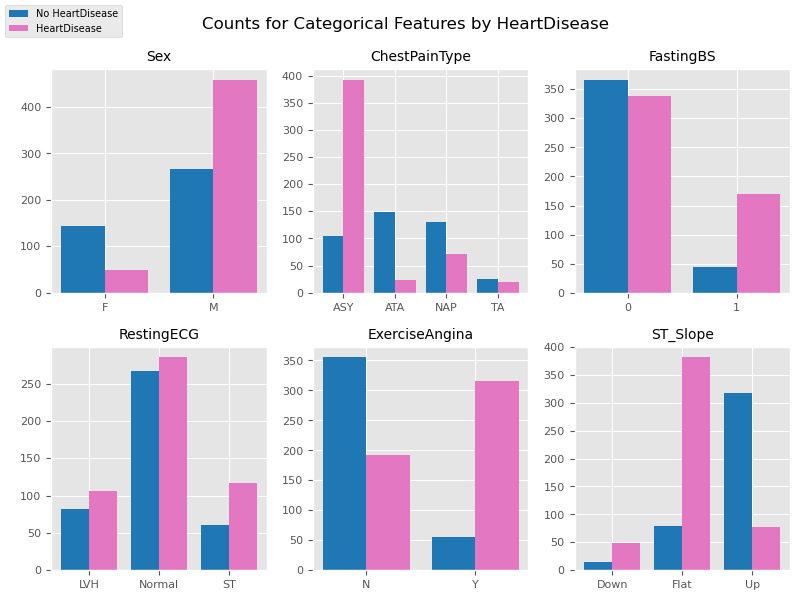

In [6]:
fig, axes = plt.subplots(2,3, figsize=(8,6))

for i, ax in enumerate(axes.reshape(-1)):
    try:
        counts = heart[[cat_cols[i],'HeartDisease']].value_counts().sort_index()
        labels = [i[0] for u, i in enumerate(counts.index) if u%2==0] # extract feature values
        heart_0 = [s for i, s in enumerate(counts.values) if i%2==0] # separate by feature response values
        heart_1 = [s for i, s in enumerate(counts.values) if i%2==1]
        
        x = np.arange(len(labels)) # x ticks positions
        width = .4

        rects1 = ax.bar(x-width/2, heart_0, width, label='No HeartDisease', color='tab:blue') # bars for each response value
        rects2 = ax.bar(x+width/2, heart_1, width, label='HeartDisease', color='tab:pink')

        ax.set_title(cat_cols[i], fontsize=10)
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.tick_params(axis='both', which='major', labelsize=8)
    except IndexError:
        pass

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', prop={'size':7})
fig.suptitle("Counts for Categorical Features by HeartDisease")
fig.tight_layout()
plt.show()


&emsp;The above grouped bar charts share valuable insights into the relationship between having heart disease and particular features or categories.  

&emsp;Focuses should be on the grouped bars (pair of blue/pink bar) where there exists significant difference in counts. For example in the **Sex** chart, almost 2 in 3 males have had heart disease while the observation is another way around for females. Also, significantly large proportion of people having **asymptomatic (ASY)** chest pain type have had heart disease compared to other 3 types. Other categories with apparent difference in having heart disease or not are people with **fasting blood sugar (FastingBS)** > 120 mg/dl, **having exercise-induced angina**, and having **flat** ST slope during peak exercise.

### Age

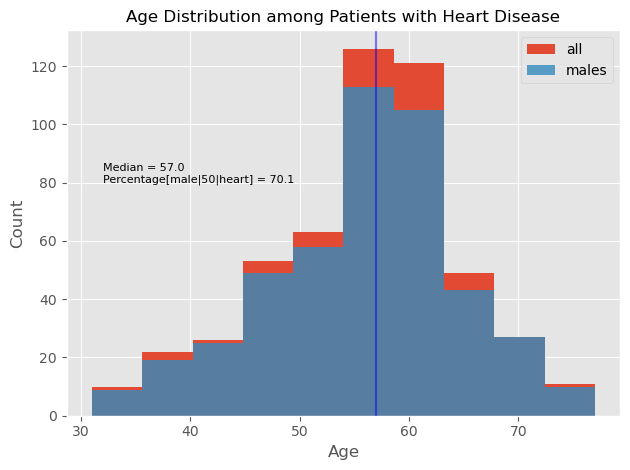

In [7]:
age_heart = heart[heart['HeartDisease']==1]['Age']
male_50_perc = round(100*len(heart.loc[(heart['HeartDisease']==1) & (heart['Sex']=='M') & (heart['Age']>=50)])/len(age_heart), 1)
median_heart = age_heart.median()
heart[heart['HeartDisease']==1]['Age'].hist(label='all')
heart.loc[(heart['HeartDisease']==1) & (heart['Sex']=='M'),]['Age'].hist(alpha=.8, label='males')
plt.axvline(median_heart, color='b', alpha=.5)
plt.text(32, 80, f"Median = {median_heart:0.1f}\nPercentage[male|50|heart] = {male_50_perc}", fontsize=8)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution among Patients with Heart Disease", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

&emsp;Among the patients with heart disease, age of 57 is the median. The perentage of males patients who are over 50 years old with heart disease is 70.1%.

# Data Cleaning

In [8]:
print("Number of rows with 0 value for Resting Blood Pressure:", len(heart[heart['RestingBP']==0]))
print("Number of rows with 0 value for Cholesterol:", len(heart[heart['Cholesterol']==0]))

Number of rows with 0 value for Resting Blood Pressure: 1
Number of rows with 0 value for Cholesterol: 172


&emsp;Removing (172) rows with 0 value for **Cholesterol** would remove a significant portion of information or records from the dataset. So replacing the values with median **Cholesterol** according to the **HeartDisease** group would be a better approach whereas the single row with 0 value for **Resting Blood Pressure** can be safely removed.

In [9]:
h1 = heart.drop(index=list(heart[heart['RestingBP']==0].index))
print(heart.shape, h1.shape)

(918, 12) (917, 12)


In [10]:
h1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [11]:
# median of Cholesterol for HeartDisease == 0
med_0 = heart[heart['HeartDisease']==0]['Cholesterol'].median()
# median of Cholesterol for HeartDisease == 1
med_1 = heart[heart['HeartDisease']==1]['Cholesterol'].median()
print("Median of Cholesterol for people with Heart Disease:", med_0)
print("Median of Cholesterol for people without Heart Disease:", med_1)
# replace 0 values with medians accordingly to new dataframe h1
print("Number of rows with Cholesterol equals 0 BEFORE replacement:", h1[h1['Cholesterol']==0].shape[0])
def replace_cholesterol(row):
    if row['Cholesterol']==0:
        if row['HeartDisease']==0:
            return med_0
        else:
            return med_1
    else:
        return row['Cholesterol']
h1['Cholesterol'] = h1.apply(replace_cholesterol, axis=1)
print("Number of rows with Cholesterol equals 0 AFTER replacement:", h1[h1['Cholesterol']==0].shape[0])

Median of Cholesterol for people with Heart Disease: 227.0
Median of Cholesterol for people without Heart Disease: 217.0
Number of rows with Cholesterol equals 0 BEFORE replacement: 171
Number of rows with Cholesterol equals 0 AFTER replacement: 0


# Feature Selection

&emsp;As discussed in above visualizations, the following categorical features show apparent relationship with having Heart Disease or the opposite.  
* Sex  
* ChestPainType  
* FastingBS  
* ExerciseAngina  
* ST_Slope  

&emsp;Apart from these, cholesterol level is also known to be a risk factor for heart disease (Mayo Clinic, accessed Jun 11, 2024).

In [12]:
print("Original shape:", h1.shape)
h1 = pd.get_dummies(h1, columns=['Sex','RestingECG','ChestPainType','FastingBS','ExerciseAngina','ST_Slope'], drop_first=True, dtype=int)
print("Shape after converting categorical into dummy variables:", h1.shape)
h1.head(2)

Original shape: (917, 12)
Shape after converting categorical into dummy variables: (917, 16)


,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_M,RestingECG_Normal,RestingECG_ST,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_1,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289.0,172,0.0,0,1,1,0,1,0,0,0,0,0,1
1,49,160,180.0,156,1.0,1,0,1,0,0,1,0,0,0,1,0


In [13]:
# Re-arrange response variable HeartDisease to the last column named y
h1['y'] = h1['HeartDisease']
h1 = h1.drop(columns=['HeartDisease'])

<Axes: >

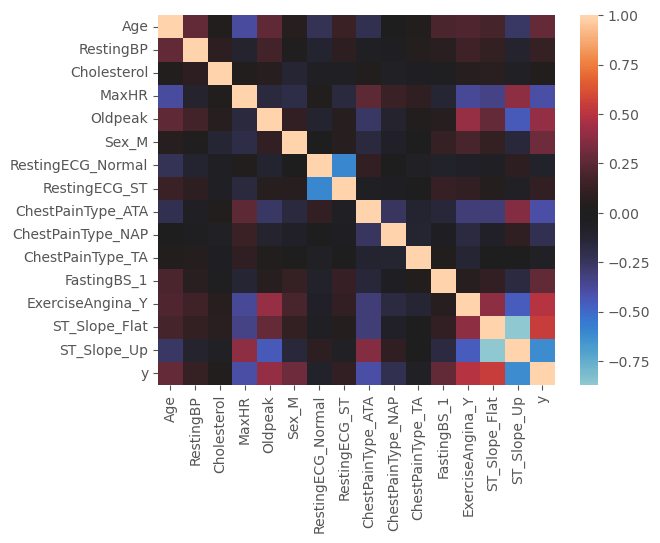

In [14]:
sns.heatmap(h1.corr(), center=0)

&emsp;The brighter the colour, the stronger the correlation is between two variables. Positive correlation is denoted by redness while negative correlation is denoted by blueness.  
&emsp;Along the row or the column of response variable y, there are some moderate to strong correlations between y and variables of ST_Slope_Up, ST_Slop_Flat, and ExerciseAngina_Y. According to the visualization previously, asymtomatic chest pain (ASY) seems to be greatly related to having HeartDisease. To represent a sample having ASY (as value of 1), other chest pain types are to be 0.  
&emsp;Apart from the few mentioned variables, Age, MaxHR, and Oldpeak may also be used to train the model first because they have fair correlations with HeartDisease. Removing them consecutively to re-train the model to compare the performance may be considered.

# Model Building

Selected features for the preliminary model are listed as follows. The whole dataset is divided into training (60%), validation (20%), and testing (20%) sets.

In [15]:
# Selected features
feats = ['Age',
         'Sex_M',
         'ChestPainType_ATA',
         'ChestPainType_NAP',
         'ChestPainType_TA',
         'FastingBS_1',
         'ExerciseAngina_Y',
         'ST_Slope_Flat',
         'ST_Slope_Up',
         'MaxHR',
         'Oldpeak']

In [16]:
# Split dataset into training, validation, and test sets
X = h1[feats]
y = h1['y']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=.2*X.shape[0]/X_train.shape[0], random_state=4)
print("Training:", f"{X_train.shape[0]} x {X_train.shape[1]}")
print(f"{y_train.value_counts().sort_values()}\n")
print("Validation:", f"{X_val.shape[0]} x {X_val.shape[1]}")
print(f"{y_val.value_counts().sort_values()}\n")
print("Test:", f"{X_test.shape[0]} x {X_test.shape[1]}")
print(f"{y_test.value_counts().sort_values()}\n")


# Scale features in the training set
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_train_scaled.head()

Training: 549 x 11
y
0    249
1    300
Name: count, dtype: int64

Validation: 184 x 11
y
0     83
1    101
Name: count, dtype: int64

Test: 184 x 11
y
0     78
1    106
Name: count, dtype: int64



,Age,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_1,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,MaxHR,Oldpeak
0,0.625000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.733813,0.243902
1,0.625000,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.438849,0.414634
2,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.676259,0.560976
3,0.708333,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.575540,0.243902
4,0.729167,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.165468,0.487805


In [17]:
# Scale features in the validation and testing set
X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

## Models Using Single Feature

&emsp;To quickly see the predictive power of the features, performance of the models with each feature is compared in the following.

In [18]:
# Hyperparameters to be considered
params = {"n_neighbors":[3,5,7,9,11,13,17,25],
          "weights":['uniform','distance'],
          "p":[2,3]}
accuracies = {}
# Models with each feature
for f in feats:
    knn = KNeighborsClassifier()
    knn_grid = GridSearchCV(knn, params, scoring='accuracy')
    knn_grid.fit(X_train_scaled[[f]], y_train)
    accuracies[f] = round(knn_grid.best_estimator_.score(X_val_scaled[[f]], y_val)*100, 1)

In [19]:
# Display performance
accuracies = pd.DataFrame.from_dict(accuracies, orient='index', columns=['accuracy']).sort_values(by=['accuracy'], ascending=True)
accuracies

,accuracy
ChestPainType_NAP,45.1
ChestPainType_TA,54.9
FastingBS_1,60.3
MaxHR,63.6
Age,64.7
Sex_M,69.6
ChestPainType_ATA,70.1
Oldpeak,70.7
ExerciseAngina_Y,73.4
ST_Slope_Flat,76.1


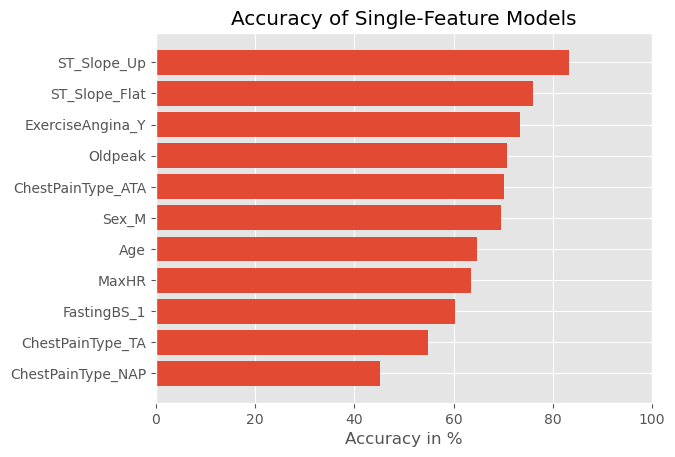

In [20]:
# Visualize Performance
plt.barh(accuracies.index, width=[v[0] for v in accuracies.values])
plt.title("Accuracy of Single-Feature Models")
plt.xlim(0,100)
plt.xlabel("Accuracy in %")
plt.show()

In [21]:
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, params, scoring='accuracy')
knn_grid.fit(X_train_scaled[['ChestPainType_TA','ChestPainType_NAP']], y_train)
print(round(knn_grid.best_estimator_.score(X_val_scaled[['ChestPainType_TA','ChestPainType_NAP']], y_val)*100, 1))

58.2


&emsp;Both categories, Up and Flat, in ST_Slope as predictors performed the best among the selected features. ChestPainType, however, yielded relatively weak accuracies. Opposite to the expectation of high predictive power of asymtomatic ChestPainType, combination of the rest of chest pain types only produces ~58.2% accuracy.

## Multi-Feature Models

&emsp;With the impression about the power of all the selected features on the response, I am building a saturated model with all the features which could be followed by removing one feature at a time according to the accuracies to get the best model.

In [22]:
# List of features ordered by accuracies
features = accuracies.sort_values(by="accuracy", ascending=False).index

In [23]:
# Hyperparameters to be considered
params = {"n_neighbors":[3,5,7,9,11,13,17,25],
          "weights":['uniform','distance'],
          "p":[2,3]}
accuracies = {}
best_params = {}
best_estimators = {}
# Models with each feature
for trial in range(len(features),0,-1):
    knn = KNeighborsClassifier()
    knn_grid = GridSearchCV(knn, params, scoring='accuracy')
    knn_grid.fit(X_train_scaled[features[0:trial]], y_train)
    best_params[trial] = knn_grid.best_params_
    best_estimators[trial] = knn_grid.best_estimator_
    accuracies[trial] = round(knn_grid.best_estimator_.score(X_val_scaled[features[0:trial]], y_val)*100, 1)

In [24]:
# Display performance
accuracies = pd.DataFrame.from_dict(accuracies, orient='index', columns=['accuracy']).sort_index(ascending=False)
accuracies

,accuracy
11,87.0
10,87.5
9,86.4
8,87.5
7,88.0
6,87.0
5,84.2
4,83.2
3,84.8
2,83.2


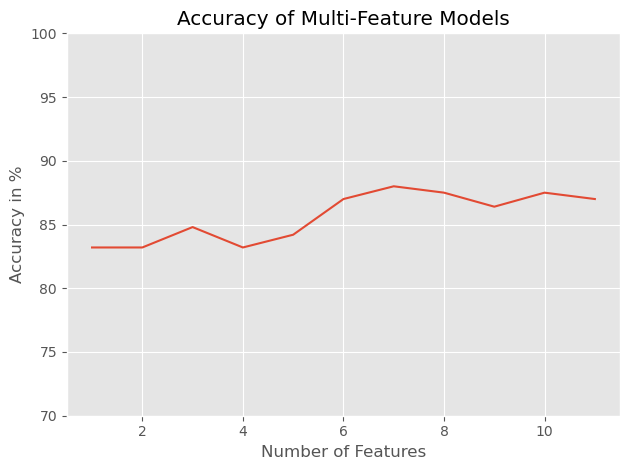

In [25]:
# Visualize Performance
plt.plot(accuracies)
plt.title("Accuracy of Multi-Feature Models")
plt.xlabel("Number of Features")
plt.ylabel("Accuracy in %")
plt.ylim(70,100)
plt.tight_layout()
plt.show()

&emsp;The result shows that the model with *7* features yielded the best accuracy of 88.0%.

In [26]:
print(f"The features and hyperparameters which contributed to the best accuracy are\n{list(features[0:7])} and \n{best_params[7]} respectively.")

The features and hyperparameters which contributed to the best accuracy are
['ST_Slope_Up', 'ST_Slope_Flat', 'ExerciseAngina_Y', 'Oldpeak', 'ChestPainType_ATA', 'Sex_M', 'Age'] and 
{'n_neighbors': 17, 'p': 3, 'weights': 'uniform'} respectively.


# Model Evaluation

In [27]:
# Features, hyperparameters, and estimator from the best model
best_features = (features[0:7])
best_estimator = best_estimators[7]
best_estimator.score(X_val_scaled[best_features], y_val)

0.8804347826086957

In [28]:
# Evaluate on test set
y_pred = best_estimator.predict(X_test_scaled[best_features])

In [29]:
# Accuracy
accuracy_test = 100 * (y_pred == y_test).sum() / len(y_test)
print("Accuracy:", f"{round(accuracy_test,1)}%")

Accuracy: 81.0%


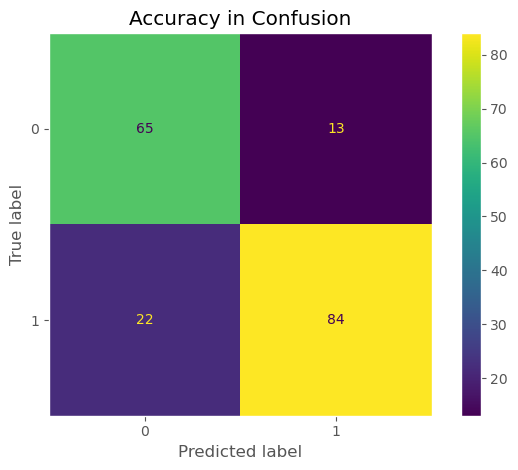

In [30]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.title("Accuracy in Confusion")
plt.tight_layout()
plt.show()

&emsp;The accuracy of the model against the unseen data reduced to 81.0%. However, the sensitivity (recall) value is only 79.2%. It means that generally the model fails to identify 2 patients out of 10 who also have heart disease. In medical context like this where a serious disease is to be predicted, a higher (or nearly perfect) sensitivity is preferred despite having an acceptable number of false positive. Thus, to improve the model in terms of its sensitivity, some future works can be done which could be  
* Collect model data from patients with Heart Disease,  
* Re-train models with different sets of features,  
* Perform grid search with more hyperparameter combinations.

# References

Mayo Clinic 2024. *High Cholesterol* accessed Jun 11, 2024. https://www.mayoclinic.org/diseases-conditions/high-blood-cholesterol/symptoms-causes/syc-20350800#:~:text=Your%20body%20needs%20cholesterol%20to,to%20flow%20through%20your%20arteries.